<a href="https://colab.research.google.com/github/hiyeontae/SkillTreePython-DeepLearning/blob/main/00.%EC%B6%94%EA%B0%80%ED%95%99%EC%8A%B5/ch00_03_OpenCV%EA%B8%B0%EC%B4%88_%EB%A7%88%EC%8A%A4%ED%81%AC%EC%99%80%ED%95%84%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch00.03. OpenCV기초 - 이미지 변환

---
* 날짜:
* 이름:

## 학습내용
    - 이미지에 마스크 씌우기
    - 이미지 채널 분할
    - 임계 처리
    - 경계선 그리기

## 학습자료
- [OpenCV 홈페이지](https://opencv.org/)

- [OpenCV-pythoin Documentation](https://opencv-python.readthedocs.io/en/latest/)

```
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
cv2.__version__
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
cv2.__version__

'4.1.2'

## 이미지 준비
---

```
path = 'sea.JPG'
img = cv2.imread(path)
h, w, c = img.shape
print(f"width: {w} pixels")
print(f"heigh: {h} pixels")
print(f"channels: {c}")
cv2_imshow(img)
```

width: 635 pixels
heigh: 382 pixels
channels: 3


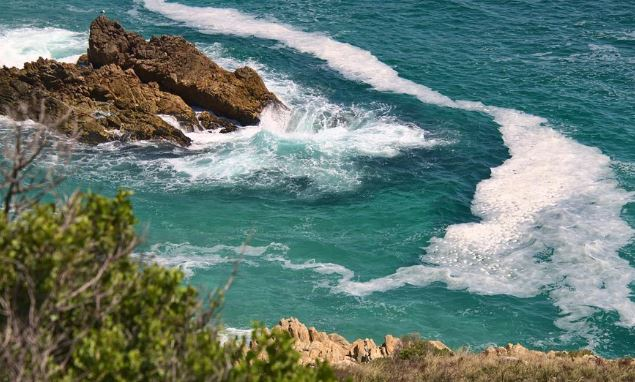

In [3]:
path = 'sea.png'
img = cv2.imread(path)
h, w, c = img.shape
print(f"width: {w} pixels")
print(f"heigh: {h} pixels")
print(f"channels: {c}")
cv2_imshow(img)

* 이미지 중앙 (center) 정하기

In [6]:
center = (int(w/2), int(h/2))
print(center)

(317, 191)


## Mask
---

#### `cv2.bitwise_and(img1, img2, mask)`

* 검정색 백그라운드 생성

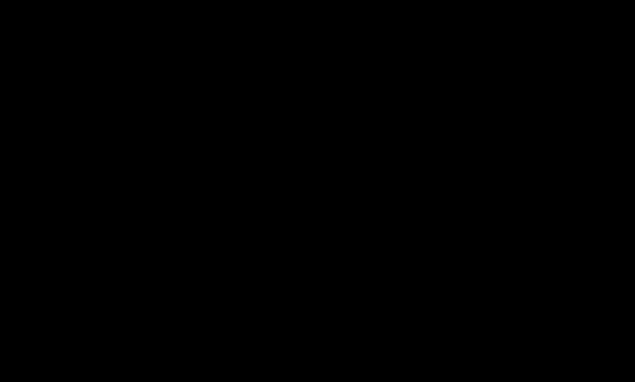

(382, 635)

In [33]:
bkg = np.full((h,w),(0),dtype=np.uint8)
cv2_imshow(bkg)
bkg.shape

* 흰색 부분 생성(중앙에 원을 그려보자)

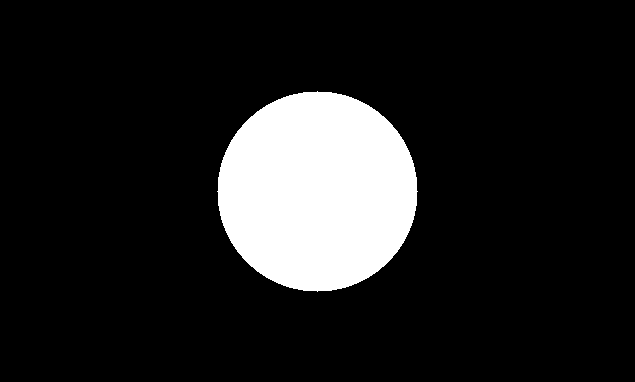

In [36]:
mask=cv2.circle(bkg,center,100,(255,255,255),-1 )
cv2_imshow(mask)

* 마스크 생성 및 적용



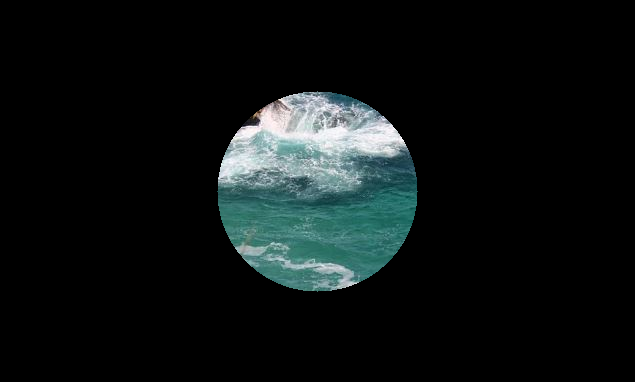

In [37]:
masked=cv2.bitwise_and(img, img, mask=mask)
cv2_imshow(masked)

## 채널 분할 및 합치기
---


#### `cv2.split(img)`



### | `split` 사용해 채널 분할하기

* 검정색 백그라운드 생성

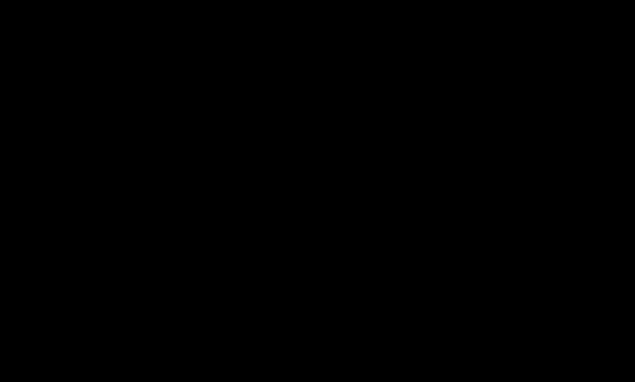

(382, 635)

In [38]:
bkg = np.full((h,w),(0),dtype=np.uint8)
cv2_imshow(bkg)
bkg.shape

* `split` 함수로 분할하기


In [42]:
Blue, Green, Red = cv2.split(img)
print(Blue.shape, Green.shape, Red.shape)

(382, 635) (382, 635) (382, 635)


* 분할된 채널 보기

In [45]:
for channel in [Blue, Green, Red]:
 cv2_imshow(channel)

SyntaxError: ignored

* 분할된 채널 보기 2

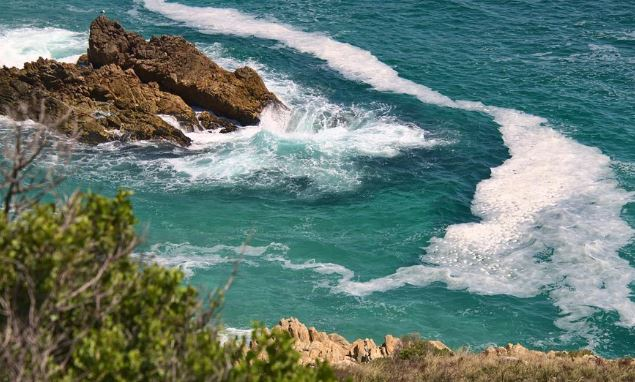

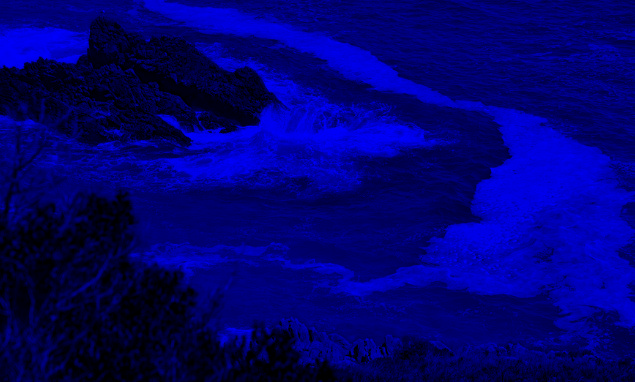

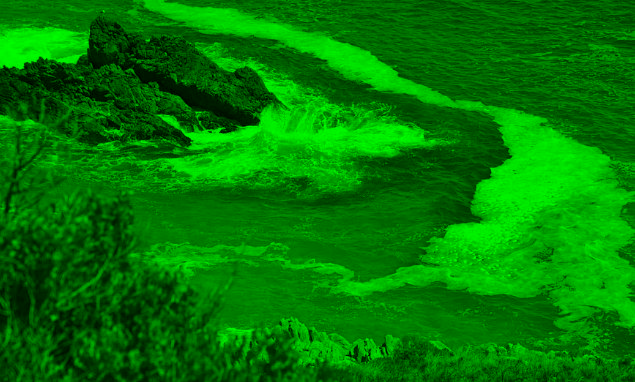

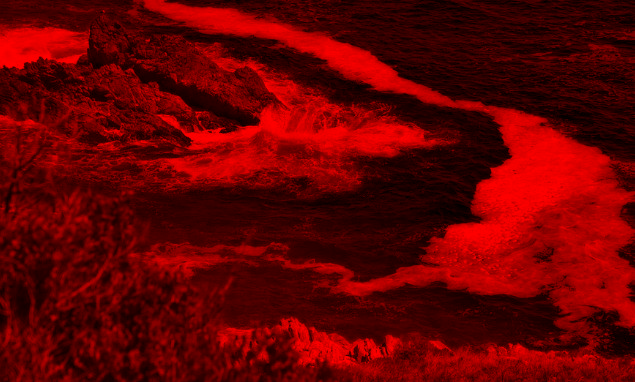

In [53]:
#Green.shape, bkg.shape
merged=cv2.merge([Blue, Green, Red])  #B,G,R
cv2_imshow(merged)
Blue_img=cv2.merge([Blue,bkg,bkg])
Green_img=cv2.merge([bkg,Green,bkg])
Red_img=cv2.merge([bkg,bkg,Red])

for channel in [Blue_img, Green_img, Red_img]:
 cv2_imshow(channel)

### **| 넘파이 이용해 분할하기**

* 넘파이 슬라이싱 이용해 채널 분할

* 분할 결과 보기

## 기본 임계처리
---

기본 임계처리는 사용자가 고정된 임계값을 결정하고 그 결과를 보여주는 단순한 형태입니다.

#### `cv2.threshold(src, thresh, maxval, type)`
* Parameters
  * rc – input image로 single-channel 이미지.(grayscale 이미지)
  * thresh – 임계값
  * maxval – 임계값을 넘었을 때 적용할 value
  * type – thresholding type
    * `cv2.THRESH_BINARY`
    * `cv2.THRESH_BINARY_INV`
    * `cv2.THRESH_TRUNC`
    * `cv2.THRESH_TOZERO`
    * `cv2.THRESH_TOZERO_INV`
* Returns
  * retval
  * dst

* GRAY 스케일로 이미지 변환

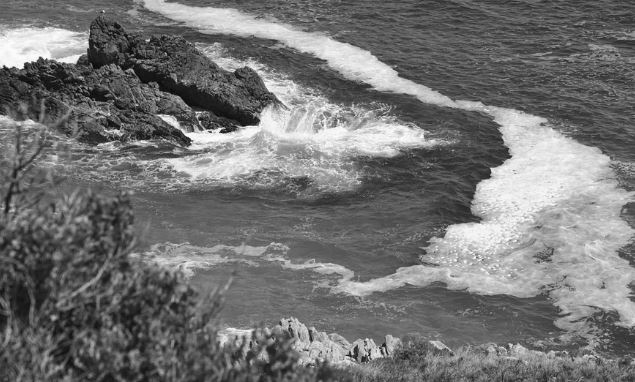

In [55]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

* gray 이미지 임계 처리

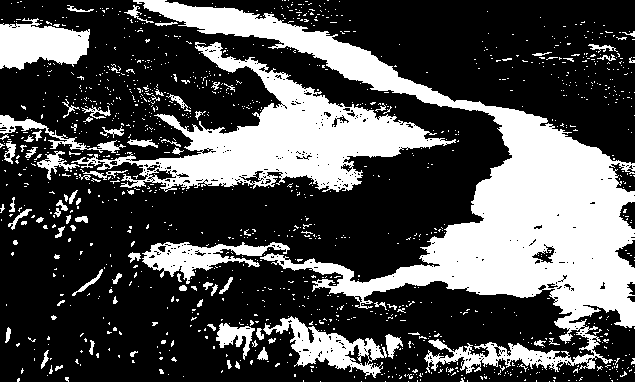

(382, 635)

In [61]:
_,binary = cv2.threshold(gray, 127,255, cv2.THRESH_BINARY)
cv2_imshow(binary)
binary.shape

## 경계선 그리기
---

Contours란 동일한 색 또는 동일한 강도를 가지고 있는 영역의 경계선을 연결한 선으로 등고선이 이에 해당한다.

#### `cv2.findContours(image, mode, method)`

* Parameters
  * image – 8-bit single-channel image. binary image.
  * mode – contours를 찾는 방법
    * `cv2.RETR_EXTERNAL` : contours line중 가장 바같쪽 Line만 찾음.
    * `cv2.RETR_LIST` : 모든 contours line을 찾지만, hierachy 관계를 구성하지 않음.
    * `cv2.RETR_CCOMP` : 모든 contours line을 찾으며, hieracy관계는 2-level로 구성함.
    * `cv2.RETR_TREE` : 모든 contours line을 찾으며, 모든 hieracy관계를 구성함.
  * method – contours를 찾을 때 사용하는 근사치 방법

    * `cv2.CHAIN_APPROX_NONE` : 모든 contours point를 저장.
    * `cv2.CHAIN_APPROX_SIMPLE` : contours line을 그릴   * 수 있는 point 만 저장. (ex; 사각형이면 4개 point)
    * `cv2.CHAIN_APPROX_TC89_L11` : contours point를 찾는 algorithm
    * `cv2.CHAIN_APPROX_TC89_KCOS` : contours point를 찾는 algorithm

* Returns 
  * contours
  * hierarchy

In [64]:
contours,_=cv2.findContours(binary, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))
contours = sorted(contours, key=cv2.contourArea , reverse=True) #정렬, 정렬방식 
contours =contours[0:10]
print(len(contours))

1744
10


* 경계선 그리기

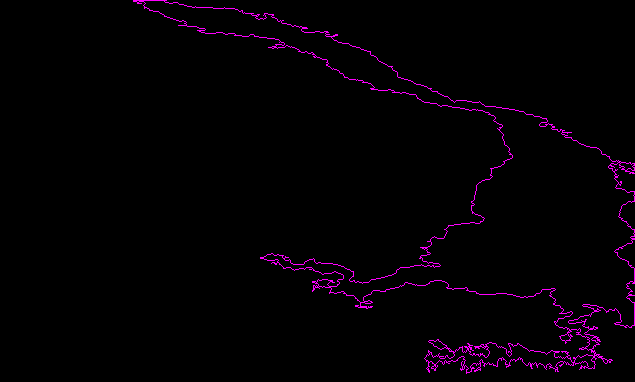

In [68]:
bkg=np.full((h,w,c),(0,0,0), dtype=np.uint8)

result = cv2.drawContours(bkg,contours,0,(255,0,255))
cv2_imshow(result)

* 이미지 위에 경계선 그리기

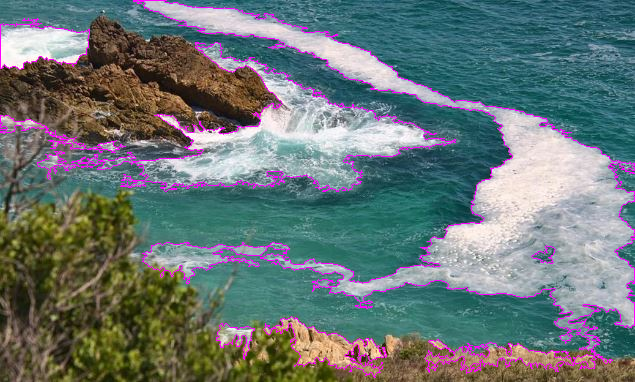

In [70]:
for i in range(10):
  cv2.drawContours(img, contours, i, (255,0,255))
cv2_imshow(img)

## 예제 
---

#### **예제 01**

`img2`가 다음과 같이 주어졌을 때, `cv2.threshold(src, thresh, maxval, type)` 함수의 `type`을 변환해 가며 임계처리를 해 보세요. 원본이미지와 5개의 type으로 임계처리한 이미지까지 총 6개의 이미지를 비교하세요. 

 ```
line = np.linspace(0,255,100).reshape(100,1)
img2 = np.concatenate([line for i in range(100)],axis=1)
cv2_imshow(img2)
 ```

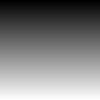

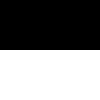

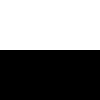

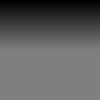

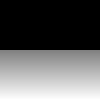

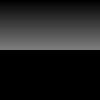

In [72]:
line = np.linspace(0,255,100).reshape(100,1)
img2 = np.concatenate([line for i in range(100)],axis=1)
cv2_imshow(img2)  #원본
_,binary2 = cv2.threshold(img2, 127,255, cv2.THRESH_BINARY)
_,binary3 = cv2.threshold(img2, 127,255, cv2.THRESH_BINARY_INV)
_,binary4 = cv2.threshold(img2, 127,255, cv2.THRESH_TRUNC)
_,binary5 = cv2.threshold(img2, 127,255, cv2.THRESH_TOZERO)
_,binary6 = cv2.threshold(img2, 127,255, cv2.THRESH_TOZERO_INV)
cv2_imshow(binary2)
cv2_imshow(binary3)
cv2_imshow(binary4)
cv2_imshow(binary5)
cv2_imshow(binary6)

#### **예제 02**

경계선 찾기를 다른 이미지에 적용해 봅니다. 

1. 동물 이미지
2. 도로 또는 도로 위 차량 이미지

width: 600 pixels
heigh: 400 pixels
channels: 3


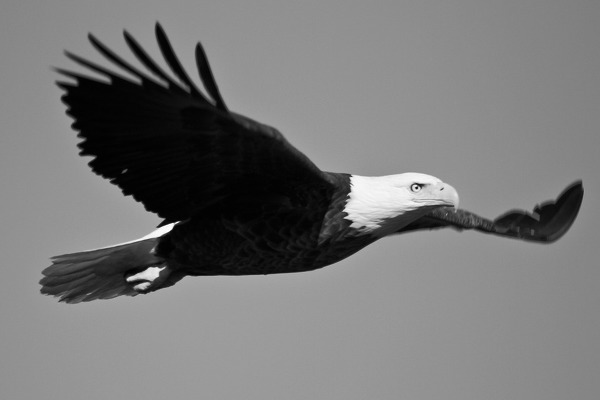

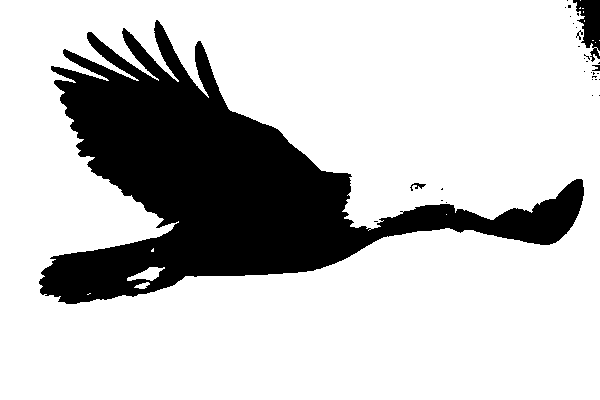

45
10


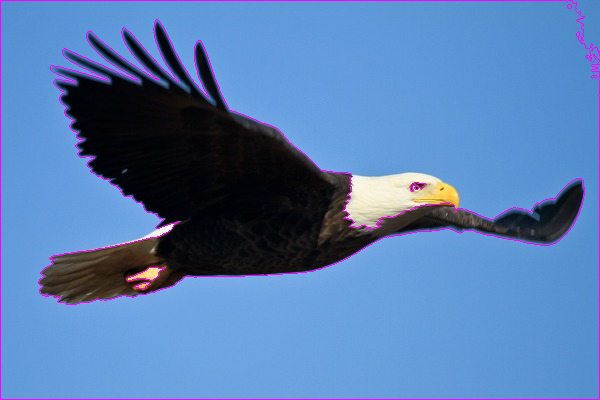

In [78]:
path = 'p5.jpg'
img = cv2.imread(path)
h, w, c = img.shape
print(f"width: {w} pixels")
print(f"heigh: {h} pixels")
print(f"channels: {c}")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

_,binary = cv2.threshold(gray, 127,255, cv2.THRESH_BINARY)
cv2_imshow(binary)

contours,_=cv2.findContours(binary, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))
contours = sorted(contours, key=cv2.contourArea , reverse=True) #정렬, 정렬방식 
contours =contours[0:10]
print(len(contours))

for i in range(10):
  cv2.drawContours(img, contours, i, (255,0,255))
cv2_imshow(img)

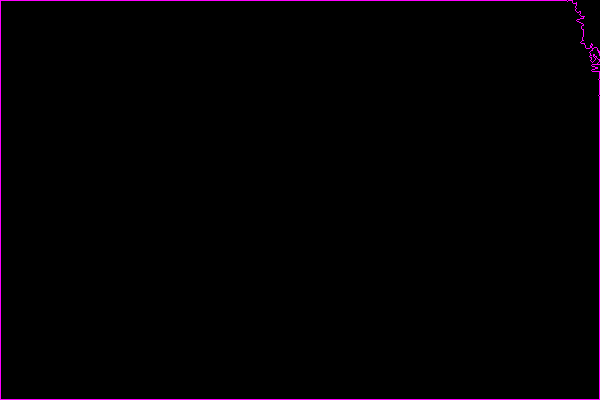

In [79]:
bkg=np.full((h,w,c),(0,0,0), dtype=np.uint8)

result = cv2.drawContours(bkg,contours,0,(255,0,255))
cv2_imshow(result)